In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

In [2]:
incom = np.loadtxt('10_input.txt',delimiter=" ", comments=None,dtype=str)

In [ ]:
incom_test = np.array(['.....','.....','#.#..','#....','#####'])
incom = np.copy(incom_test)

In [3]:
incom

array(['.#......##.#..#.......#####...#..',
       '...#.....##......###....#.##.....',
       '..#...#....#....#............###.',
       '.....#......#.##......#.#..###.#.',
       '#.#..........##.#.#...#.##.#.#.#.',
       '..#.##.#...#.......#..##.......##',
       '..#....#.....#..##.#..####.#.....',
       '#.............#..#.........#.#...',
       '........#.##..#..#..#.#.....#.#..',
       '.........#...#..##......###.....#',
       '##.#.###..#..#.#.....#.........#.',
       '.#.###.##..##......#####..#..##..',
       '.........#.......#.#......#......',
       '..#...#...#...#.#....###.#.......',
       '#..#.#....#...#.......#..#.#.##..',
       '#.....##...#.###..#..#......#..##',
       '...........#...#......#..#....#..',
       '#.#.#......#....#..#.....##....##',
       '..###...#.#.##..#...#.....#...#.#',
       '.......#..##.#..#.............##.',
       '..###........##.#................',
       '###.#..#...#......###.#........#.',
       '.......#....#.#.#..#..#.

Okay, each line is loaded as a separate cell in the array. How long is each line?

In [4]:
print('Number of lines = ' + str(len(incom)))
print('Length of line = ' + str(len(incom[0])))

Number of lines = 33
Length of line = 33


The plan here is to calculate the angle from an asteroid to every other asteroid. The number of unique angles is the number of visible asteroids.

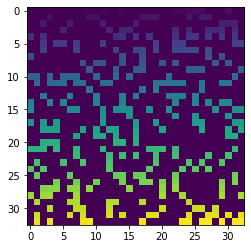

In [5]:
# Find the asteroids

ast_array = np.zeros((len(incom),len(incom[0])))

ast_count = 1

for i, line in enumerate(incom):
    for j in range(len(line)):
        if incom[i][j] == '#':
            ast_array[i,j] = ast_count
            ast_count += 1
            
plt.imshow(ast_array)
        

Sweet. Asteroid coordinates now known, and visualized!

Okay, now I'd like to create an asteroid class.

In [7]:
class Asteroid:
    def __init__(self,x,y):
        self.x = x
        self.y = y
        self.angles = []
        
        asteroids.append(self)
        
    def angle(self, asteroid):
        
        distance = np.sqrt((self.x - asteroid.x)**2+(self.y - asteroid.y)**2)
        
        # Check for angle = +/- pi/2
        if self.x == asteroid.x:
            if self.y > asteroid.y:
                angle = 3*np.pi/2
                self.angles.append([angle,distance,asteroid.x,asteroid.y]) # Add angle to list of angles
            elif self.y < asteroid.y:
                angle = np.pi/2
                self.angles.append([angle,distance,asteroid.x,asteroid.y]) # Add angle to list of angles
        
        # Check for angle zero or pi
        elif self.y == asteroid.y:
            if self.x > asteroid.x:
                angle = 0
                self.angles.append([angle,distance,asteroid.x,asteroid.y]) # Add angle to list of angles
            elif self.x < asteroid.x:
                angle = np.pi
                self.angles.append([angle,distance,asteroid.x,asteroid.y]) # Add angle to list of angles              
        else:
            # Calculate the angle
            angle = -math.atan((self.x - asteroid.x)/(self.y - asteroid.y))
            # Correct for quadrant
            if self.y > asteroid.y:
                angle = 3*np.pi/2-angle
            else:
                angle = np.pi/2-angle
            
            # Add angle to list of angles
            self.angles.append([angle,distance,asteroid.x,asteroid.y])

In [8]:
# Create asteroid instances

asteroids=[] # create an empty list of instances

ast_count = 0 # asteroid counter

for i in range(ast_array.shape[0]):
    for j in range(ast_array.shape[1]):
        if ast_array[i,j] != 0:
            vars()['asteroid'+str(ast_count)] = Asteroid(i,j)
            ast_count += 1

print(str(len(asteroids)) + ' asteroids detected!')

303 asteroids detected!


In [9]:
# Populate .angles for each asteroid:
for AST in asteroids:
    for ast in asteroids:
        AST.angle(ast)

In [10]:
ast_los = [] # a list of asteroid line-of-sights

for ast in asteroids:
    ast_los.append(len(set(np.array(ast.angles)[:,0])))
    
# show the most LOS
asteroid_base = vars()['asteroid'+str(np.where(np.array(ast_los)==np.max(ast_los))[0][0])]
print('max line-of-sights = ' + str(np.max(ast_los))
      + ', from asteroid' + str(np.where(np.array(ast_los)==np.max(ast_los))[0][0]))



max line-of-sights = 256, from asteroid262


Part 2: find the 200th asteroid blasted.

In [11]:
# Use a dataframe to sort the angles from the asteroid base from 0, then by distance from the base.

base_angles_df = pd.DataFrame(asteroid_base.angles).sort_values([0,1])

blasted = 1
blast_angle = -0.00000001

# Then remove the asteroids, one by one
while blasted <= 200:
    
    try:
        blasted_idx = base_angles_df.index[base_angles_df[0] > blast_angle][0] # returns first index of asteroid at next blast angle
    except IndexError: # happens when it can't find a value greater than the blast angle...
        blasted_idx = base_angles_df.index[base_angles_df[0] > -0.0000001][0] # returns first index of asteroid back at zero degrees
        print('rotation complete')
    blasted_info = base_angles_df.loc[blasted_idx] # hold the info that's about to be blasted
    
    #print('blasted '+ str(int(blasted)) +' ' + str(blasted_info[0]))
    
    base_angles_df.drop(index=blasted_idx, inplace=True) # blast the asteroid by removing it from the dataframe
    
    blast_angle = blasted_info[0] # set new blast angle
    
    blasted += 1
    
blasted_info
    

0     5.764039
1    24.186773
2     7.000000
3    17.000000
Name: 72, dtype: float64

In [12]:
# multiply the last blasted x coord by 100 and add the y coord:

blasted_info[2]*100 + blasted_info[3]

717.0

717 is too low???

Oh, I see! I have reversed the coordinates. C'mon Elwyn.... read the instructions!

In [508]:
blasted_info[3]*100 + blasted_info[2]

1707.0

Just for funsies:

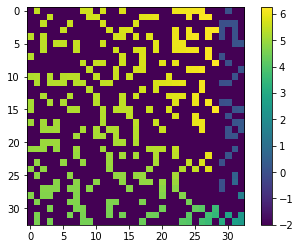

In [506]:
# check the angles...
angle_array = np.zeros_like(ast_array)-2

for ast in asteroid262.angles:
    angle_array[ast[2],ast[3]] = ast[0]
    
plt.imshow(angle_array)
plt.colorbar()

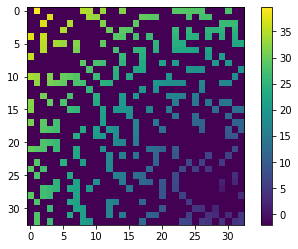

In [507]:
# check the distance...
distance_array = np.zeros_like(ast_array)-2

for ast in asteroid262.angles:
    distance_array[ast[2],ast[3]] = ast[1]
    
plt.imshow(distance_array)
plt.colorbar()